<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Problemas de clasificación y  regresión.
* Selección de atributos y parámetros de regularización en regresión lineal (Ridge y Lasso).
* Validación cruzada.
* PCA e ICA versus LDA. Reducción de dimensionalidad para clasificación.
* Selección de hı́per-parámetros estructurales en Regresión Logı́stica y Perceptrón.
* LDA, QDA, Naive Bayes en texto, clasificadores bayesianos ingenuos (Bernoulli, Multinomial)
* Preprocesamiento de datos brutos y representaciones de entrada.
 

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y discusión: 26 de Octubre y 29 de Octubre respectivamente.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea1-INF393-II-2018]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Aprendizaje con regresión lineal  
[2.](#segundo) Análisis de audios como datos brutos  
[3.](#tercero) Análisis de emociones en tweets

<a id="primero"></a>
## 1. Aprendizaje con regresión lineal.

a) Cargue los datos a analizar, descargándolos desde la plataforma como se indicó, en formato *dataframe pandas*. Descríbalos adecuadamente, ya sea la variable dependiente o las independientes, si es que lo son.

In [72]:
import pandas as pd
import numpy as np
df = pd.read_csv("world-university-rankings/timesData.csv")
df

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


b) Debido a la estructura será necesario realizar un leve pre-proceso. Existen vacíos entre los datos o valores '-', por lo que será necesario eliminarlos (*o si piensa una mejor manera de manejar ésto puede hacerlo, se verá reflejado en su nota*). Además de ésto deje los datos con *score unkown* o '-' en un conjunto *target* separado, *unlabeled data* (éste será el objetivo del entrenamiento) ¿Cuántos datos quedan en cada conjunto? 

In [73]:
def convertToInt(x):
    try:
        x = int(x)
    except:
        x = 0
    return x
df.dropna(axis=0,inplace=True,how='any') #borra nan
df["total_score"] = df["total_score"].apply(lambda x: x.replace('-','unknown')) #rellena 
df = df[~(df == '-').any(axis=1)] #elimina filas con valores nulos
#...
nuevo_df  = pd.get_dummies(df, columns=["country"]) #column to categorical
#....
nuevo_df['female'] = nuevo_df['female_male_ratio'].str.split(':', expand=True)[0].apply(convertToInt)
nuevo_df['male'] = nuevo_df['female_male_ratio'].str.split(':', expand=True)[1].apply(convertToInt)
nuevo_df['female_male_ratio'] =  np.where(nuevo_df['male'] == 0, 0, nuevo_df['female']/nuevo_df['male']) #si no hay (rellena 0) 
nuevo_df['num_students'] = nuevo_df['num_students'].apply(lambda x: int(str(x).replace(',','')))
nuevo_df['international_students'] = nuevo_df['international_students'].apply(lambda x: int(str(x).replace('%','')))
print(nuevo_df.shape)
#...
df_test = nuevo_df[nuevo_df["total_score"]=='unknown']  #para predecir al final
nuevo_df =  nuevo_df[nuevo_df["total_score"]!='unknown'] #elimina unknown rank..
print(nuevo_df.shape)
nuevo_df.head()

(2174, 82)
(954, 82)


,world_rank,university_name,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,...,country_Taiwan,country_Thailand,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States of America,female,male
1,2,California Institute of Technology,97.7,54.6,98.0,99.9,83.7,96.0,2243,6.9,...,0,0,0,0,0,0,0,1,33,67
2,3,Massachusetts Institute of Technology,97.8,82.3,91.4,99.9,87.5,95.6,11074,9.0,...,0,0,0,0,0,0,0,1,37,63
3,4,Stanford University,98.3,29.5,98.1,99.2,64.3,94.3,15596,7.8,...,0,0,0,0,0,0,0,1,42,58
5,6,University of Cambridge,90.5,77.7,94.1,94.0,57.0,91.2,18812,11.8,...,0,0,0,0,0,0,1,0,46,54
6,6,University of Oxford,88.2,77.2,93.9,95.1,73.5,91.2,19919,11.6,...,0,0,0,0,0,0,1,0,46,54


c) Cree las matrices de cada conjunto con las que trabajará. Además de ésto separe el conjunto de pruebas fijo que se utilizará, recuerde que éste no puede ser utilizado. Si estima conveniente también cree conjunto de validación.

In [74]:
Y = nuevo_df['total_score'].values
X = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).values
X_test_real = df_test.drop(["total_score","world_rank","university_name"],axis=1).values
Y = Y.astype('float32')
X = X.astype('float32')
X_test_real = X_test_real.astype('float32')
print(Y.shape)
print(X.shape)
print(X_test_real.shape)
#...
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
#...
X_val=X_train[:200]
print(X_val.shape)

(954,)
(954, 79)
(1220, 79)
(200, 79)


d) Normalice los datos antes de trabajar. Explique la importancia/conveniencia de realizar ésto.

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

e) Realice una regresión lineal de mı́nimos cuadrados básica. Mida el residuo de cada predicción en cada dato y haga un gráfico de éste ¿Qué indica lo observado?

C:\Users\Daniel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


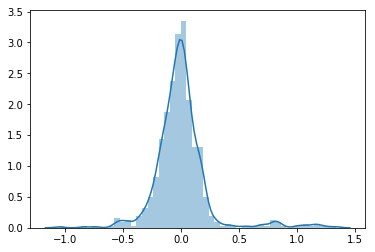

In [76]:
from sklearn.linear_model import LinearRegression as LR
linreg = LR(fit_intercept=True, n_jobs=1)
linreg.fit(X_train_scaled,y_train)
#...
import seaborn as sns
%matplotlib inline 
prediccion=linreg.predict(X_train_scaled)
res = y_train-prediccion
sns.distplot(res)

f) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? Compare y comente ¿Qué variables están más correlacionadas con la respuesta? Si usáramos un nivel de significación del 5%. ¿Qué es lo que observa y cuál puede ser la causa?

In [77]:
def Z_score(x_train, y_train, error):
    a = 0
    b = 0
    Y = y_train - np.mean(y_train)
    for i in range(len(x_train)):
        x = x_train[i]-np.mean(x_train[i])
        a += x*Y[i]
        b += x**2
    a_tongo = a/b
    std = (np.std(error)**2)/np.sqrt(b)
    return a_tongo/std
    
def F_score(x_train, y_train):
    sse = 0
    ssr = 0
    y_tongo = linreg.predict(X_train)
    y_barra = np.mean(y_train)
    for i in range(len(y_tongo)):
        ssr += (y_tongo - y_barra)**2
        sse += (y_tongo - y_train)**2
    return (ssr/1)/(sse/(len(y_tongo)-2))

def normalizar(datos):
    return (datos - np.mean(datos))/np.std(datos)

z = Z_score(X_train_scaled, y_train, res)
f = F_score(X_train_scaled, y_train)

g) Calcule la información mútua de los distintos predictores (variables) con respecto a la variable *output* o *target*. Comente con lo calculado anteriormente y se le parece razonable.

In [78]:
from sklearn.feature_selection import mutual_info_regression
minfo_predictor = mutual_info_regression(X_train_scaled,y_train)
print(minfo_predictor)

[0.89205528 0.06990055 0.92478724 0.29782822 0.124283   0.22145499
 0.24258088 0.25213209 0.30689098 0.21879091 0.18499508 0.19096138
 0.20250106 0.17053961 0.18641269 0.18188323 0.178706   0.17142564
 0.18473984 0.20825817 0.17661034 0.17044031 0.18785874 0.18112758
 0.1932381  0.18677467 0.18847256 0.18491474 0.18406108 0.21924951
 0.17983055 0.17643082 0.17004367 0.17003238 0.1823297  0.1703467
 0.1870181  0.22826896 0.22090309 0.18774727 0.174927   0.20432321
 0.15470781 0.17485371 0.19743678 0.15559662 0.20531748 0.23031666
 0.21393606 0.18403054 0.16664304 0.19432758 0.17396948 0.19159159
 0.17720136 0.16714513 0.17823926 0.1907621  0.17406796 0.16467586
 0.18589469 0.17671085 0.16162795 0.20179228 0.17321277 0.19113341
 0.19061763 0.19629533 0.19531904 0.18152483 0.16081908 0.16812713
 0.18241337 0.19965578 0.17584205 0.20849871 0.25975722 0.28511412
 0.29022949]


h)  Construya una función que implemente *Forward Step-wise Selection* (FSS). Es decir, partiendo con un modelo sin predictores (variables), agregue un predictor a la vez, re-ajustando el modelo de regresión en cada paso. Para seleccionar localmente una variable, proponga/implemente un criterio distinto al utilizado en el código de ejemplo. Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo. Ordene el eje $x$ de menor a mayor.

In [79]:
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LR(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print ("selected = %s ..."%names_x[best_candidate])
        print ("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
    return selected
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns
print(fss(X_train_scaled,y_train,names_regressors))

selected = teaching ...
totalvars=2, mse = 27.585627
selected = citations ...
totalvars=3, mse = 10.429185
selected = research ...
totalvars=4, mse = 2.441643
selected = international ...
totalvars=5, mse = 0.315024
selected = income ...
totalvars=6, mse = 0.069449
selected = country_Egypt ...
totalvars=7, mse = 0.064533
selected = year ...
totalvars=8, mse = 0.061104
selected = country_United States of America ...
totalvars=9, mse = 0.059326
selected = num_students ...
totalvars=10, mse = 0.058948
selected = country_Spain ...
totalvars=11, mse = 0.058592
selected = country_France ...
totalvars=12, mse = 0.058370
selected = international_students ...
totalvars=13, mse = 0.058097
selected = country_New Zealand ...
totalvars=14, mse = 0.057909
selected = country_Turkey ...
totalvars=15, mse = 0.057762
selected = country_China ...
totalvars=16, mse = 0.057651
selected = country_Japan ...
totalvars=17, mse = 0.057570
selected = country_Italy ...
totalvars=18, mse = 0.057480
selected = coun

i) Ajuste un modelo lineal utilizando “*Ridge Regression*”, es decir, regularizando con la norma $l_2$. Utilice valores del parámetro de regularización $\lambda$ en el rango [$10^0, 10^6$], variando si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Deje un gráfico sólo para analizar los coeficientes de los países. Describa lo que observa.

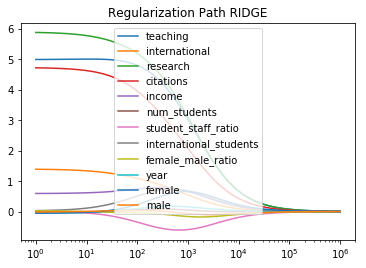

In [80]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name", "country_Turkey"],axis=1).columns
alphas_ = np.logspace(0,6,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
ax = plt.gca()
plt.rcParams['figure.figsize'] = [10,10]
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" not in label:
        plt.plot(alphas_, y_arr, label=label)
ax.set_xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend()
plt.show()

De este gráfico se ve que los parametros con mayor valoración a lo largo del intervalo son research, teaching y citations. Los otros parámetros a pesar de que se acerquen mas rápido a la valoración 0, estos no pueden despreciarse. Esto debido a que en RIDGE los parámetros no son 0, por lo cual podrían pcorrir errores si se desprecian del modelo prematuramente.

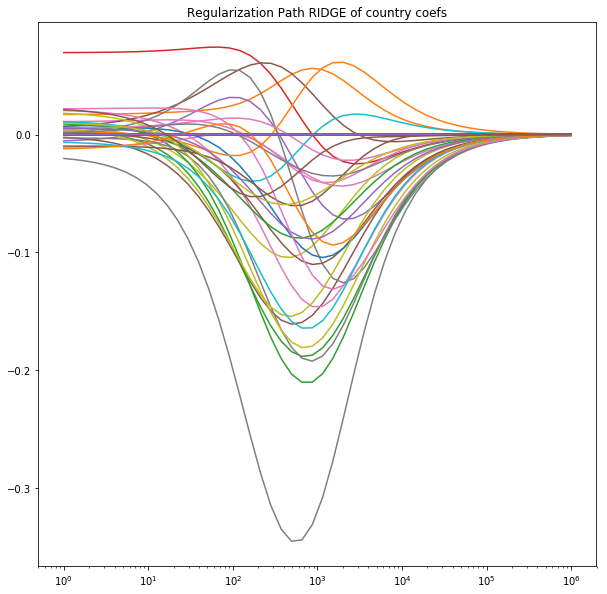

In [81]:
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name", "country_Turkey"],axis=1).columns
alphas_ = np.logspace(0,6,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
ax = plt.gca()
plt.rcParams['figure.figsize'] = [10,10]
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" in label:
        plt.plot(alphas_, y_arr)
ax.set_xscale('log')
plt.title('Regularization Path RIDGE of country coefs')
plt.show()

Se ve que muchos paises tienden a desvalorizarse en torno a 10^5 y 10^6, aun así, no hay razones suficientes para despreciar los paises en el modelo debido a que todavia siguen teniendo una valoración que ronda 0.

j) Ajuste un modelo lineal utilizando el método “*Lasso*”, es decir, regularizando con la norma $l_1$. Utilice valores del parámetro de regularización $\lambda$ en el rango [$10^{-2},10^3$]. Para obtener el código, modifique el ejemplo anterior. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. ¿Es más efectivo *Lasso* para seleccionar atributos?

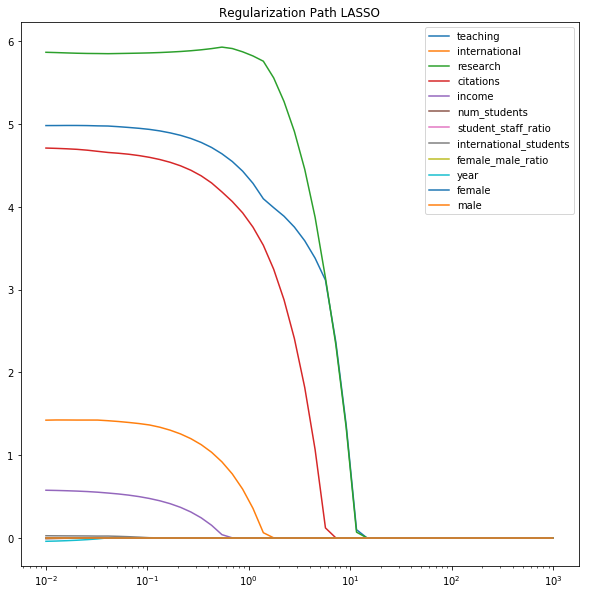

In [82]:
from sklearn.linear_model import Lasso
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns
alphas_ = np.logspace(-2,3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
ax = plt.gca()
plt.rcParams['figure.figsize'] = [10,10]
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" not in label:
        plt.plot(alphas_, y_arr,label=label)
ax.set_xscale('log')
plt.title('Regularization Path LASSO')
plt.legend()
plt.show()

En este gráfico se ve que muchas variables pesan muy poco en el principio del gráfico, lo que segun Lasso no es una mala razón para no tomarlas en cuenta. Tambien se ve que al llegar un poco mas allá de 10^1, muchos parametros tiene muy poca valoración en el modelo, por lo que podrían haber anomalias en el entrenamiento del modelo debido a la poca cantidad de variables con un peso significativo. Se ve además que los parametros con peso en el intervalo graficado son research, teaching y citations.

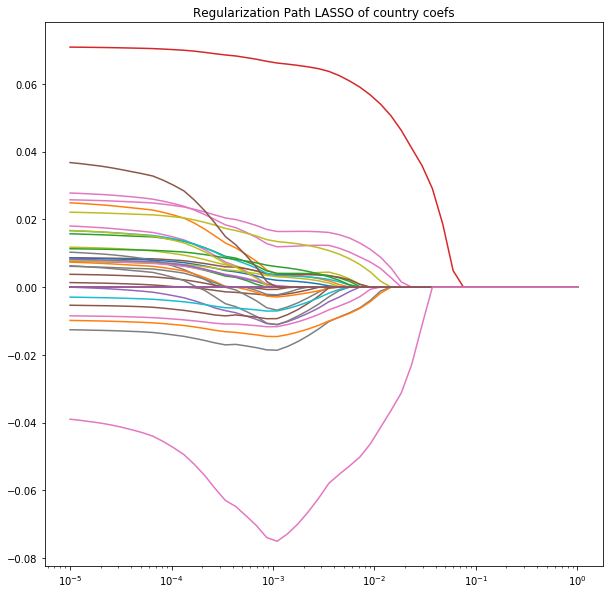

In [83]:
from sklearn.linear_model import Lasso
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns
country_alphas_ = np.logspace(-5,0,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in country_alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
ax = plt.gca()
plt.rcParams['figure.figsize'] = [10,10]
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" in label:
        plt.plot(country_alphas_, y_arr)
ax.set_xscale('log')
plt.title('Regularization Path LASSO of country coefs')
plt.show()

Se ve que hay muchos paises que se desprecian del modelo debido a que sus pesos son muy pequeños conparados con el resto de parámetros vistos anteriormente.A diferencia de RIDGE, estos parámetros si pueden despreciarse debido a que sus pasos van a 0 segun la regularización Lasso.

k) Escogiendo uno de los dos métodos regularizadores anteriores, especificando el porqué, construya un gráfico que muestre el error de entrenamiento y el de pruebas como función del parámetro de regularización. Discuta lo que  observa.

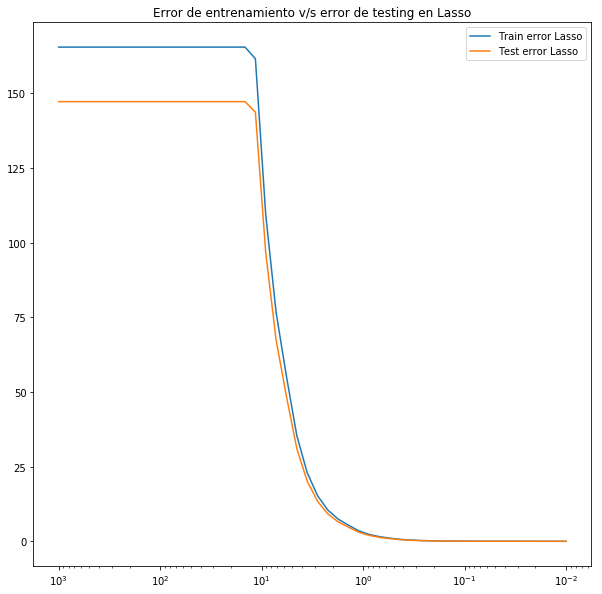

In [84]:
alphas_ = np.logspace(-2,3,base=10) #se escoge
coefs = []
model = Lasso(fit_intercept=True) #se escoge
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    yhat_train = model.predict(X_train_scaled)
    yhat_test = model.predict(X_test_scaled)
    mse_train.append(np.mean(np.power(yhat_train - y_train, 2)))
    mse_test.append(np.mean(np.power(yhat_test - y_test, 2)))
ax = plt.gca()
plt.title("Error de entrenamiento v/s error de testing en Lasso")
ax.plot(alphas_,mse_train,label='Train error Lasso')
ax.plot(alphas_,mse_test,label='Test error Lasso')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

El error de entrenamiento y error de testing constanetes en el intervalo [10^3,10^1] (aproximadamente), se explica por el gráfico de regularización de lasso(el visto mas arriba, el cual no considera a los paises). En ese gráfico se ve que lasso desprecia muchas variables en el intervalo de lamda seleccionado, de hecho, en ese punto soloamente el index se podría estar utilizando para entrenar. Debido al intervalo 10^-3, 10^0 escogido para el entrenamiento, se puden tomar las variables que no se han despreciado para el training en ese momento.

l) Estime el valor del parámetro de regularización en **alguno** de los modelos anteriores haciendo uso de la técnica validación cruzada con un número de folds igual a $K= 5$ y $K = 10$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Mida el error real del modelo (ésto es sobre el conjunto de pruebas). Debido a la escala del error puede utilizar auxiliarmente *MAE* como métrica de desempeño. Compare y concluya.

In [85]:
#mse = minimun square error
#mae = mean absolute error
yhat_test = linreg.predict(X_test_scaled)
mse_test = np.mean(np.power(yhat_test - y_test, 2))
from sklearn.model_selection import KFold
K=5
kf = KFold(n_splits=K)
mse_cv = 0
mae_cv = 0
for train, val in kf.split(X_train_scaled):
    linreg = LR(fit_intercept=True, n_jobs=1)
    linreg.fit(X_train_scaled[train], y_train[train])
    yhat_kfold_val = linreg.predict(X_train_scaled[val])
    mse_fold = np.mean(np.power(yhat_kfold_val - y_train[val], 2))
    mae_fold = np.mean(np.abs(yhat_kfold_val - y_train[val]))
    mae_cv += mae_fold 
    mse_cv += mse_fold
mse_cv = mse_cv / K
mae_cv = mae_cv / K
print(mae_cv)
print(np.sqrt(mse_cv))

1222.1510186597704
19730.272376058252


m) Con el modelo que se piense que es el mejor, en base a todo lo experimentado. Realice el *ranking* de las universidades del que no se tienen etiquetas (*unlabeled data* o *target data*) a través de predecir los datos que se dejaron como *pruebas* y ordenar su score en el *dataframe*.

In [86]:
model = Lasso(fit_intercept=True)
model.set_params(alpha=10**(-2))
model.fit(X_train_scaled, y_train)
print(X_test_real.shape)
print(df_test["total_score"].shape)
df_test["total_score"] = model.predict(X_test_real) #predict score
...#armar un raking
univ_chilenas = df_test[df_test["country_Chile"]==1]
rannking_univ_ch = univ_chilenas.sort_values(by="total_score",ascending=False)
ranking = 1
for index,row in rannking_univ_ch.iterrows():
    print("%d - Institucion: %s" %(ranking,row["university_name"]))
    ranking+=1

(1220, 79)
(1220,)
1 - Institucion: Federico Santa María Technical University
2 - Institucion: Federico Santa María Technical University
3 - Institucion: Austral University of Chile
4 - Institucion: Pontifical Catholic University of Valparaíso
5 - Institucion: University of Santiago, Chile (USACH)


<a id="segundo"></a>
## 2. Análisis de audios como datos brutos

a) Construya un dataframe con los datos a analizar. Describa el dataset y determine cuántos registros hay
por clase.

In [42]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

In [43]:
import pandas as pd
import numpy as np
df = pd.read_csv('./heartbeat-sounds/set_a.csv')

b) Lea los archivos *.wav* y transformelos en secuencias de tiempo. Realice un *padding* de ceros al final de cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la importancia de realizar este paso.

In [44]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux
new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='./heartbeat-sounds/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))
new_df

,file_name,time_series,len_series
0,artifact__201012172012.wav,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900
1,artifact__201105040918.wav,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900
2,artifact__201105041959.wav,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900
3,artifact__201105051017.wav,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900
4,artifact__201105060108.wav,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900
5,artifact__201105061143.wav,"[-2.0, 2.0, -2.0, 2.0, -2.0, 1.0, 1.0, -3.0, 3...",396900
6,artifact__201105190800.wav,"[47.0, 70.0, 47.0, 58.0, 53.0, 45.0, 13.0, 21....",396900
7,artifact__201105280851.wav,"[605.0, 648.0, 473.0, 171.0, -203.0, -512.0, -...",396900
8,artifact__201106010559.wav,"[-49.0, 0.0, 17.0, -43.0, 30.0, 9.0, -29.0, 50...",396900
9,artifact__201106010602.wav,"[52.0, -1291.0, -1116.0, 101.0, 2429.0, 3776.0...",396900


c) Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto [[4]](#refs), el cual afirma que estos cambios son requeridos. Vuelva a determinar cuántos registros hay por clase. Nótese que ahora son 3 clases ¿Explique la problemática de tener etiquetas mal asignadas en los datos? ¿Un solo dato puede afectar esto?

In [45]:
new_labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]
print(new_df.target[40:75])

40             murmur
41    normal/extrahls
42    normal/extrahls
43    normal/extrahls
44    normal/extrahls
45    normal/extrahls
46    normal/extrahls
47    normal/extrahls
48    normal/extrahls
49    normal/extrahls
50    normal/extrahls
51    normal/extrahls
52    normal/extrahls
53    normal/extrahls
54    normal/extrahls
55             murmur
56    normal/extrahls
57    normal/extrahls
58    normal/extrahls
59             murmur
60             murmur
61             murmur
62    normal/extrahls
63    normal/extrahls
64             murmur
65    normal/extrahls
66             murmur
67             murmur
68    normal/extrahls
69             murmur
70             murmur
71             murmur
72             murmur
73             murmur
74             murmur
Name: target, dtype: object


d) Codifique las distintas clases a valores numéricos para que puedan ser trabajados por los algoritmos
clasificadores.

In [46]:
new_df['target'] = new_df['target'].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)
new_df

,file_name,time_series,len_series,target
0,artifact__201012172012.wav,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900,0
1,artifact__201105040918.wav,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900,0
2,artifact__201105041959.wav,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900,0
3,artifact__201105051017.wav,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900,0
4,artifact__201105060108.wav,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900,0
5,artifact__201105061143.wav,"[-2.0, 2.0, -2.0, 2.0, -2.0, 1.0, 1.0, -3.0, 3...",396900,0
6,artifact__201105190800.wav,"[47.0, 70.0, 47.0, 58.0, 53.0, 45.0, 13.0, 21....",396900,0
7,artifact__201105280851.wav,"[605.0, 648.0, 473.0, 171.0, -203.0, -512.0, -...",396900,0
8,artifact__201106010559.wav,"[-49.0, 0.0, 17.0, -43.0, 30.0, 9.0, -29.0, 50...",396900,0
9,artifact__201106010602.wav,"[52.0, -1291.0, -1116.0, 101.0, 2429.0, 3776.0...",396900,0


e) Desordene los datos, evitando ası́ el orden en el que vienen la gran mayorı́a de las etiquetas. Cree la matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una secuencia de amplitudes en el tiempo. ¿Las dimensiones de ésta indica que puede generar problemas? ¿De qué tipo?

In [47]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
print(X.shape)

(176, 396900)


f) Para pre-procesar la secuencia en el tiempo realice una transformada de fourier discreta [[5]](#refs) para pasar los datos desde el dominio de tiempos al dominio de frecuencias presentes en la señal de sonido. Visualice el cambio de representación.

In [48]:
X_fourier = np.abs(np.fft.fft(X))

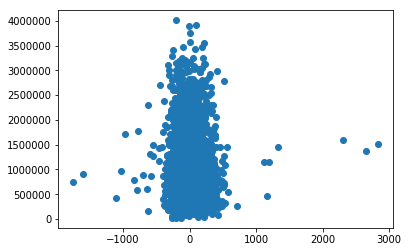

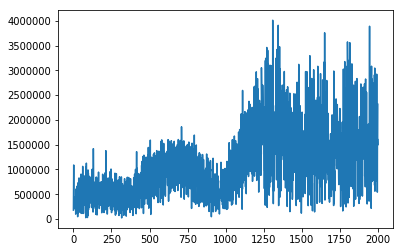

In [49]:
plt.scatter(X[0][0:2000], X_fourier[0][0:2000])
plt.show()
plt.plot(X_fourier[0][0:2000])

g) Para seguir con el pre-procesamiento realice un muestreo representativo de los datos a través de una técnica de muestreo especializada en secuencias ¿En qué beneficia este paso? ¿Cómo podrı́a determinar si el muestro es representativo?

In [50]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape

C:\Users\Daniel\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
C:\Users\Daniel\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
C:\Users\Daniel\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, 

(176, 100000)

h) Debido a que no hay conjunto de pruebas, y que es necesario para evaluar la calidad **final** del modelo, genérelo a través de la técnica *hold-out*

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, random_state=42)

i) Realice un proceso de estándarizar los datos para ser trabajados adecuadamente. Recuerde que solo se debe ajustar (calcular media y desviación estándar) con el conjunto de entrenamiento.

In [52]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train_standard = std.transform(X_train)
X_test_standard = std.transform(X_test)

j) Realice una reducción de dimensionalidad a través de la técnica **PCA**, para representar los datos en $d = 2$ dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el conjunto de entrenamiento. Visualice apropiadamente la proyección en 2 dimensiones.

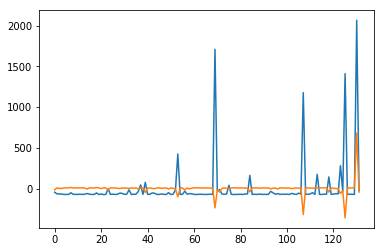

In [53]:
from sklearn.decomposition import PCA
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train_standard)
X_pca_train = pca_model.transform(X_train_standard)
#X_pca_test = pca_model.transform(X_test_standard)
plt.plot(X_pca_train)

k) Entrene un modelo de Regresión Logı́stica variando el parámetro de regularización $C$ construyendo un gráfico resumen del error en función de este hiper-parámetro. Además entrene un Perceptrón, variando el hiper-parámetro de regularización $\alpha$ en el rango inverso que para la Regresión Logı́stica ¿Por qué? Contruya el mismo gráfico resumen, en función de $C$ o $\alpha$. Compare y comente lo observado.

In [54]:
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = [1/c for c in Cs]
from sklearn.linear_model import Perceptron,LogisticRegression

In [55]:
errores_LR = []
for i in Cs:
    model_LR = LogisticRegression(penalty='l2', C=i,max_iter=200)
    model_LR.fit(X_train, y_train)
    error_LR = y_train - model_LR.predict(X_train)
    errores_LR.append(error_LR)

In [41]:
errores_Per = []
for i in alphas:
    model_Per = Perceptron(penalty='l2', alpha=i, max_iter=200)
    model_Per.fit(X_train, y_train)
    error_Per = y_train - model_Per.predict(X_train)
    errores_Per.append(error_Per)

ValueError: Unknown label type: (array([41.5, 41.6, 42.4, 42.5, 42.8, 42.9, 43. , 43.1, 43.2, 43.4, 43.8,
       44.1, 44.3, 44.5, 44.6, 44.7, 44.8, 44.9, 45. , 45.2, 45.3, 45.5,
       45.6, 45.7, 45.8, 45.9, 46. , 46.1, 46.2, 46.3, 46.4, 46.6, 46.7,
       46.9, 47. , 47.1, 47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8, 47.9,
       48. , 48.1, 48.3, 48.5, 48.6, 48.7, 48.8, 48.9, 49. , 49.1, 49.2,
       49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50. , 50.1, 50.2, 50.3, 50.4,
       50.5, 50.6, 50.8, 50.9, 51. , 51.1, 51.2, 51.3, 51.4, 51.5, 51.6,
       51.7, 51.8, 51.9, 52. , 52.1, 52.3, 52.4, 52.5, 52.6, 52.7, 52.8,
       52.9, 53. , 53.1, 53.2, 53.3, 53.4, 53.5, 53.6, 53.7, 53.8, 53.9,
       54.1, 54.2, 54.3, 54.4, 54.5, 54.6, 54.7, 54.8, 54.9, 55. , 55.1,
       55.2, 55.3, 55.4, 55.5, 55.6, 55.7, 55.8, 55.9, 56. , 56.1, 56.2,
       56.3, 56.4, 56.5, 56.6, 56.7, 56.8, 56.9, 57. , 57.1, 57.2, 57.3,
       57.4, 57.5, 57.6, 57.7, 57.8, 57.9, 58. , 58.1, 58.2, 58.3, 58.4,
       58.5, 58.6, 58.7, 58.8, 59. , 59.1, 59.2, 59.4, 59.5, 59.6, 59.7,
       59.8, 59.9, 60.1, 60.3, 60.4, 60.7, 60.8, 60.9, 61. , 61.1, 61.2,
       61.3, 61.4, 61.5, 61.6, 61.7, 61.9, 62. , 62.2, 62.3, 62.4, 62.5,
       62.7, 62.9, 63. , 63.2, 63.5, 63.6, 63.7, 64. , 64.2, 64.3, 64.4,
       64.5, 64.6, 64.9, 65.1, 65.3, 65.5, 65.7, 65.9, 66.1, 66.3, 66.4,
       66.5, 66.8, 66.9, 67. , 67.4, 67.5, 67.6, 67.7, 67.8, 68.1, 68.2,
       68.4, 68.6, 69.3, 69.4, 69.5, 69.9, 70. , 70.1, 70.4, 70.8, 70.9,
       71. , 71.2, 71.6, 71.8, 71.9, 72. , 72.1, 72.2, 72.3, 72.4, 72.8,
       72.9, 73. , 73.1, 73.2, 73.4, 73.8, 74.3, 74.4, 74.5, 74.8, 74.9,
       75. , 75.1, 75.3, 75.4, 75.5, 75.6, 75.8, 76. , 76.1, 76.5, 76.9,
       77.1, 77.2, 77.3, 77.4, 77.9, 78. , 78.2, 78.4, 78.7, 78.8, 79.2,
       79.3, 79.5, 80.3, 80.9, 81. , 81.2, 82.3, 82.4, 82.6, 82.7, 82.8,
       83.1, 83.2, 83.3, 83.4, 83.7, 84. , 84.6, 84.9, 85.2, 85.6, 85.8,
       86.4, 87.4, 87.5, 89.1, 89.2, 89.5, 89.8, 90.1, 90.5, 90.6, 90.7,
       90.9, 91.2, 91.9, 92. , 92.3, 92.4, 92.7, 92.8, 92.9, 93. , 93.1,
       93.2, 93.6, 93.7, 93.8, 93.9, 94.2, 94.8, 94.9, 95.6, 96. ],
      dtype=float32),)

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 

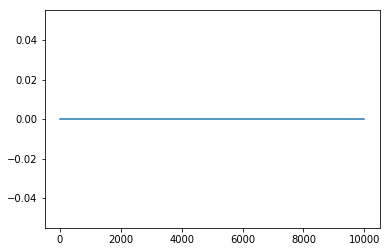

In [39]:
print(errores_LR)
#print(errores_Per)
vector_per = []
for i in errores_LR:
    vector_per.append(np.mean(i))
plt.plot(alphas, vector_per)

l) Genere otra representación de los datos a través de la técnica de reducción de dimensionalidad **ICA**, con dimensionalidad $d = 2$. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra un *warning* explique el porqué. Visualice apropiadamente la proyección en 2 dimensiones. Vuelva a realizar el item k) pero para esta nueva representación.

m) Experimente con diferentes dimensiones $d$ para la proyección de PCA e ICA con el propósito de obtener un modelo con menor error. Construya una tabla o gráfico resumen de los errores o *accuracy*, comente.

n) Realice otra reducción de dimensionalidad ahora a través de la técnica **LDA**, para representar los datos en $d = 2$ dimensiones. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra un *warning* explique el porqué. Visualice apropiadamente la proyección en 2 dimensiones.

o) Con el propósito de encontrar el mejor modelo vuelva a realizar el item k) en el nuevo espacio generado por la representación según las $d$ dimensiones de la proyección LDA. Esta nueva representación ¿mejora o empeora el desempeño? Explique.

p) Intente mejorar el desempeño de los algoritmos ya entrenados. Diseñe ahora sus propias cracterı́sticas (*feature crafting*) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros trabajos [[6]](#refs), [[7]](#refs)  si desea.

<a id="tercero"></a>
## 3. Análisis de emociones en *tweets*

a) Construya un dataframe con los datos a analizar. Determine cuántas clases existen, cuántos registros por clase y describa el dataset.

In [ ]:
import pandas as pd
df = pd.read_csv('./text_emotion.csv')
counter = {}
for i in df['sentiment']:
    if i not in counter.keys():
        counter[i] = 1
    else:
        counter[i] += 1
print(len(counter))
print(counter)
df

b) Construya un conjunto de entrenamiento y otro de pruebas, a través de una máscara aleatoria, para verificar los resultados de los algoritmos. Genere un conjunto de validación si estima conveniente.

In [ ]:
import numpy as np
#np.seed(70)
msk = np.random.rand(len(df)) < 0.8
df_ = df[msk]
df_test = df[~msk]
otro = np.random.rand(len(df_)) < 0.3
df_vali = df_[otro]
df_train = df_[~otro]
print(df_train.shape)
print(df_vali.shape)
print(df_test.shape)

c) Construya las representaciones de los datos con los que trabajará, ya sea para las entradas de los modelos como para las salidas. Recuerde que tendrá que codificar las distintas clases como valores numéricos enteros.

In [ ]:
lista = []
for i in counter:
    lista.append(i)
df_train["sentiment"] = df_train["sentiment"].apply(lambda x: lista.index(x))
df_train = df_train.drop(["tweet_id","author"],axis=1)
df_vali["sentiment"] = df_vali["sentiment"].apply(lambda x: lista.index(x))
df_vali = df_vali.drop(["tweet_id","author"],axis=1)
df_test["sentiment"] = df_test["sentiment"].apply(lambda x: lista.index(x))
df_test = df_test.drop(["tweet_id","author"],axis=1)

In [ ]:
import re, time
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
def word_extractor(text):
    wordstemmer = PorterStemmer()
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text)
    words = ""
    wordtokens = [ wordstemmer.stem(word.lower())for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words
df_train["content"] = df_train["content"].apply(lambda x: word_extractor(x)) 
df_vali["content"] = df_vali["content"].apply(lambda x: word_extractor(x))
df_test["content"] = df_test["content"].apply(lambda x: word_extractor(x))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
texts_train1 = [contenido for contenido in df_train['content']]
texts_val1 = [contenido for contenido in df_vali['content']]

vectorizer1 = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer1.fit(np.asarray(texts_train1))

features_train1 = vectorizer1.transform(texts_train1)
features_val1 = vectorizer1.transform(texts_val1)

labels_train = np.asarray((df_train.sentiment.astype(float)+1)/2.0)
labels_val = np.asarray((df_vali.sentiment.astype(float)+1)/2.0)

In [ ]:
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv):
    model = LogisticRegression()
    model = model.fit(x, y)
    print("Accuracy under training: ",model.score(x,y))
    print("Accuracy under validation: ",model.score(xv,yv))
    return model
log_model1 = do_LOGIT(features_train1,labels_train*10,features_val1,labels_val*10)
resultados = log_model1.predict_proba(features_train1)

In [ ]:
for i in resultados:
    print(np.argmax(i))
    #print(df_train['sentiment'])
df_train['sentiment']

d) Entrene y compare al menos 4 de los diferentes clasificadores vistos en clases para clasificación (por ejemplo: Navie Bayes, Multinomial Naive Bayes, LDA, QDA, Regresión logı́stica y Perceptrón). Recuerde que algunos son extendidos por defecto a múltiples clases para detectar emociones en cada *tweet*, sin embargo, otros deben ser extentidos a través de otras técnicas, tal como *One vs One* y *One vs All/Rest*. Muestre tabla o gráfico resumen.

e) Utilice la técnica de ECOC (*Error-Correcting Output-Code*) para extender a multiclases algunos de los clasificadores utilizados en d). Comente lo que hace la técnica y los resultados observados.

f) Evalúe la métrica de *accuracy* sobre el conjunto de pruebas del mejor clasificador encontrado.  
*Recuerde que puede acudir a otras métricas para tener otras visiones de lo que está haciendo el modelo de aprendizaje*

g) Intente mejorar su resultado considerablemente a través de alguna mejora novedosa. Se espera que supere el 35% de *accuracy*.

<a id="refs"></a>
## Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] Ethem Alpaydin. *Machine Learning*. 2014.  
[3] Bentley, P. and Nordehn, G. and Coimbra, M. and Mannor (2011) , Classifying Heart Sounds Challenge,
CHSC2011, http://www.peterjbentley.com/heartchallenge/index.html  
[4] https://www.kaggle.com/toregil/new-labels-for-set-a  
[5] https://en.wikipedia.org/wiki/Fourier transform  
[6] https://www.kaggle.com/primaryobjects/voicegender/data  
[7] Gamit, M. R., Dhameliya, P. K., & Bhatt, N. S. (2015). Classification Techniques for Speech Recognition:
A Review. vol, 5, 58-63.  
[8] www.figure-eight.com/  
[9] https://machinelearningmastery.com/develop-word-embeddings-python-gensim/, https://radimrehurek.com/gensim/models/word2vec.html or https://nathanrooy.github.io/posts/2018-03-22/word2vec-from-scratch-with-python-and-numpy/  
[10] https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-6-doc2vec-603f11832504